In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils.logger import logger

pd.set_option('display.width', 150)

In [4]:
# Load the provided test data
csv_file_name = os.path.join('.', 'data', 'part_10_wrangled.csv')
data_df = pd.read_csv(csv_file_name)

In [5]:
# The only na values are for strings - replace with empty
data_df = data_df.fillna('')
# Infer the best data types
data_df = data_df.convert_dtypes()
# Check on the column types
data_df.dtypes

EVENT_ID                   string
CLIENT_IP                  string
CLIENT_USERAGENT           string
IS_USERAGENT_VALID        boolean
REQUEST_SIZE                Int64
RESPONSE_CODE               Int64
MATCHED_VARIABLE_SRC       string
MATCHED_VARIABLE_NAME      string
MATCHED_VARIABLE_VALUE     string
dtype: object

In [6]:
##############################################################
# 00. The default run with Scaling Enabled and Normalization Disabled
#     Using all columns for features but:
#         EVENT_ID

In [7]:
from src.features.extractor import FeatureExtractor

# Get the features for all the data with Scaling=True and PCA=False the data
extractor_00 = FeatureExtractor(is_scale=True, pca_args=None)
X_00 = extractor_00.fit_transform(data_df)

00:17:50 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID']
00:17:50 INFO (extractor:65): Actual Scaling flag: True
00:17:50 INFO (extractor:73): Actual PCA arguments: None, the PCA is: Disabled
00:17:50 INFO (extractor:110): Start fitting the Feature Extraction model
00:17:50 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'REQUEST_SIZE', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:17:50 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
00:17:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
00:17:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
00:17:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
00:17:52 INFO (extractor:126): Start fitting the scaler
00:17:52 INFO (extractor:134): Fitting the Feature Extractor model is done!
00:17:52 INFO (extractor:175): Start 

In [8]:
%%capture
from src.features.utils import create_2d_projection

# Compute the feature space projection
X_00_proj = create_2d_projection(X_00)

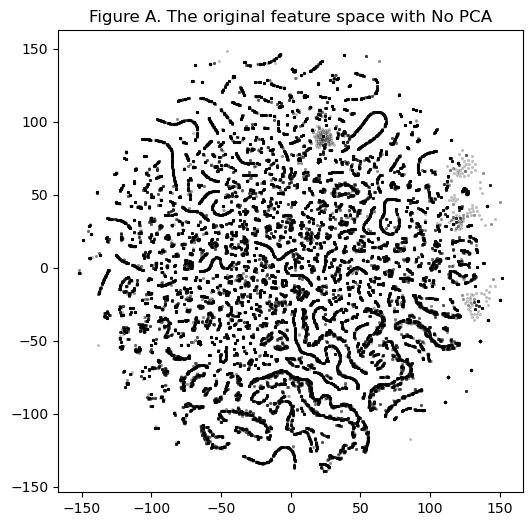

In [9]:
from src.features.utils import plot_2d_feature_space

# Plot the resulting feature space in 2D
plot_2d_feature_space(X_00_proj, title='Figure A. The original feature space with No PCA')

In [10]:
##############################################################
# 01. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID

In [11]:
# Get the features for all the data with Scaling and PCA the data
extractor_01 = FeatureExtractor()
X_01 = extractor_01.fit_transform(data_df)

00:19:53 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID']
00:19:53 INFO (extractor:65): Actual Scaling flag: True
00:19:53 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
00:19:53 INFO (extractor:110): Start fitting the Feature Extraction model
00:19:53 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'REQUEST_SIZE', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:19:53 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
00:19:53 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
00:19:53 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
00:19:53 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
00:19:55 INFO (extractor:126): Start fitting the scaler
00:19:55 INFO (extractor:131): Start fitting the PCA
00:19:55 INFO (extractor:134): Fitting 

10:39:06 INFO (utils:30): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8']
10:39:06 INFO (extractor:145): Feature to PCA conponent contributions:
pca0    REQUEST_SIZE
pca1     CLIENT_IP_6
pca2     CLIENT_IP_7
pca3     CLIENT_IP_2
pca4     CLIENT_IP_5
pca5     CLIENT_IP_1
pca6     CLIENT_IP_3
pca7     CLIENT_IP_4
pca8     CLIENT_IP_0
dtype: object
10:39:06 INFO (extractor:146): The main features contributed to PCA components:
['REQUEST_SIZE', 'CLIENT_IP_6', 'CLIENT_IP_7', 'CLIENT_IP_2', 'CLIENT_IP_5', 'CLIENT_IP_1', 'CLIENT_IP_3', 'CLIENT_IP_4', 'CLIENT_IP_0']
10:39:06 INFO (extractor:147): The variance explained per PCA component:
[9.53606314e-01 2.46938817e-02 2.09417498e-02 4.85816958e-04
 1.50394316e-04 6.45124298e-05 3.06114516e-05 2.49536267e-05
 1.05135792e-06]


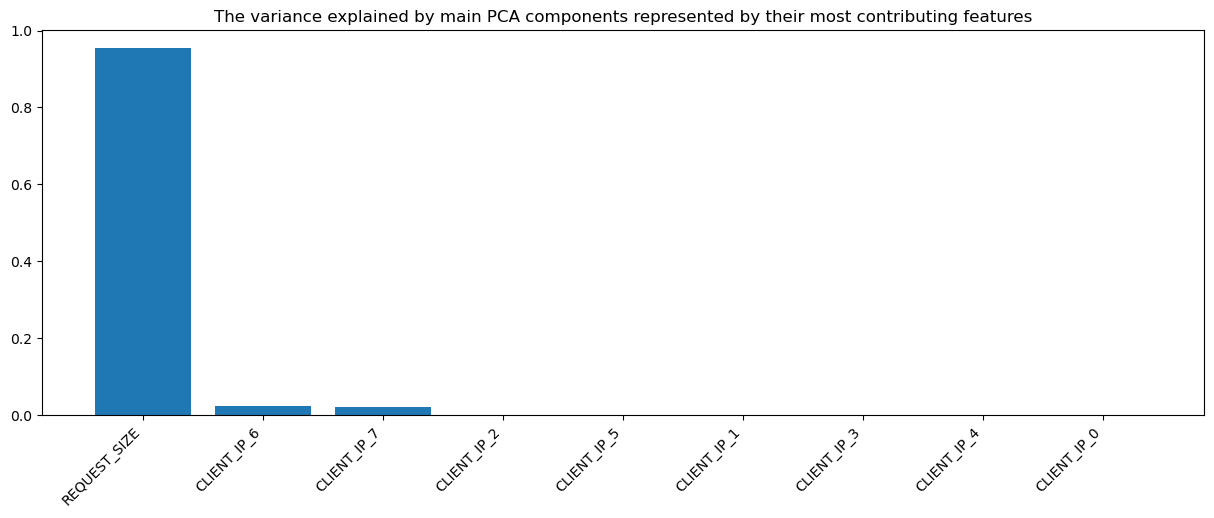

In [38]:
from src.features.utils import plot_variance_explained

# Plot the resulting feature space data
plot_variance_explained(extractor_01)

In [13]:
%%capture
# Compute the feature space projection
X_01_proj = create_2d_projection(X_01)

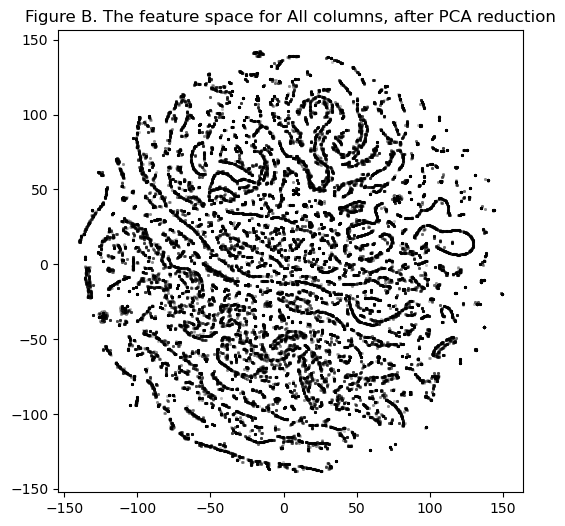

In [14]:
# Plot the resulting feature space in 2D
plot_2d_feature_space(X_01_proj, title='Figure B. The feature space for All columns, after PCA reduction')

In [15]:
# Note: In principle looking at PCA results and tyhe 2D projection of the 
#       original and the reduced space we see that we could just go with
#       CLIENT_IP and REQUEST_SIZE as the main data column to produce features

In [16]:
##############################################################
# 02. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE

In [17]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_02 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE'])
X_02 = extractor_02.fit_transform(data_df)

00:21:54 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE']
00:21:54 INFO (extractor:65): Actual Scaling flag: True
00:21:54 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
00:21:54 INFO (extractor:110): Start fitting the Feature Extraction model
00:21:54 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:21:54 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
00:21:54 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
00:21:54 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
00:21:55 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
00:21:56 INFO (extractor:126): Start fitting the scaler
00:21:56 INFO (extractor:131): Start fitting the PCA
00:21:56 INFO (extractor:134): Fitting 

00:21:57 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8']
00:21:58 INFO (extractor:146): The complete PCA component feature contributions are:
      CLIENT_IP_0  CLIENT_IP_1  CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  CLIENT_IP_5  CLIENT_IP_6  CLIENT_IP_7  CLIENT_USERAGENT_0  \
pca0     0.000522     0.002201     0.010064     0.001980     0.000926     0.001560     0.966241     0.257419            0.000002   
pca1     0.001216     0.007846     0.019327     0.005161     0.002806     0.004179     0.257147     0.966120            0.000001   
pca2     0.020119     0.336059     0.915879     0.122805     0.092113     0.153832     0.015819     0.018454            0.000007   
pca3     0.041767     0.084401     0.257322     0.426851     0.502023     0.700487     0.000606     0.002197            0.000003   
pca4     0.019648     0.830270     0.283906     0.336144     0.134422     0.314004     0.000654     0.001309            0.000006   
p

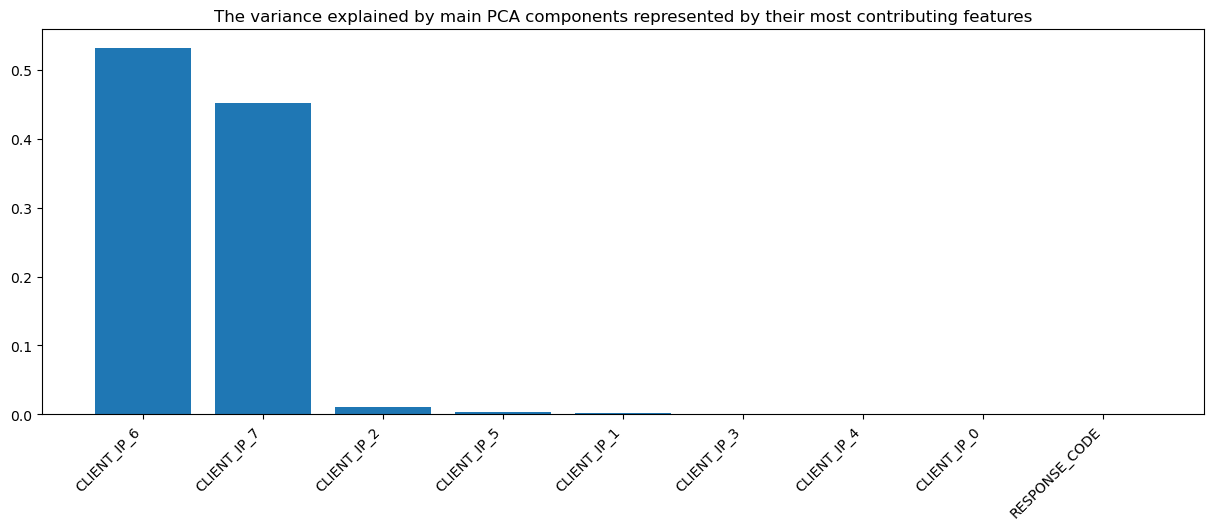

In [18]:
# Plot the resulting feature space data
plot_variance_explained(extractor_02)

In [19]:
##############################################################
# 03. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE, CLIENT_IP

In [20]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_03 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP'])
X_03 = extractor_03.fit_transform(data_df)

00:21:58 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP']
00:21:58 INFO (extractor:65): Actual Scaling flag: True
00:21:58 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
00:21:58 INFO (extractor:110): Start fitting the Feature Extraction model
00:21:58 INFO (extractor:105): Considering feature columns: ['CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:21:58 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
00:21:58 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
00:21:58 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
00:21:58 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
00:22:00 INFO (extractor:126): Start fitting the scaler
00:22:00 INFO (extractor:131): Start fitting the PCA
00:22:00 INFO (extractor:134): Fitting 

00:22:01 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44' 'pca45']
00:22:01 INFO (extractor:150): The PCA components (absolute, maximum) relations with features:
pca0                 RESPONSE_CODE
pca1        MATCHED_VARIABLE_SRC_2
pca2            CLIENT_USERAGENT_1
pca3        MATCHED_VARIABLE_SRC_1
pca4        MATCHED_VARIABLE_SRC_0
pca5        MATCHED_VARIABLE_SRC_3
pca6            CLIENT_USERAGENT_3
pca7        MATCHED_VARIABLE_SRC_4
pca8       MATCHED_VARIABLE_NAME_0
pca9       MATCHED_VARIABLE_NAME_9
pca10     MATCHED_VARIABLE_NAME_11
pca11       MATCHED_VARIABLE_SRC_4
pca12     MATCHED_VARIABLE_NAME_11
pca13      MATCHED_VARIABLE_N

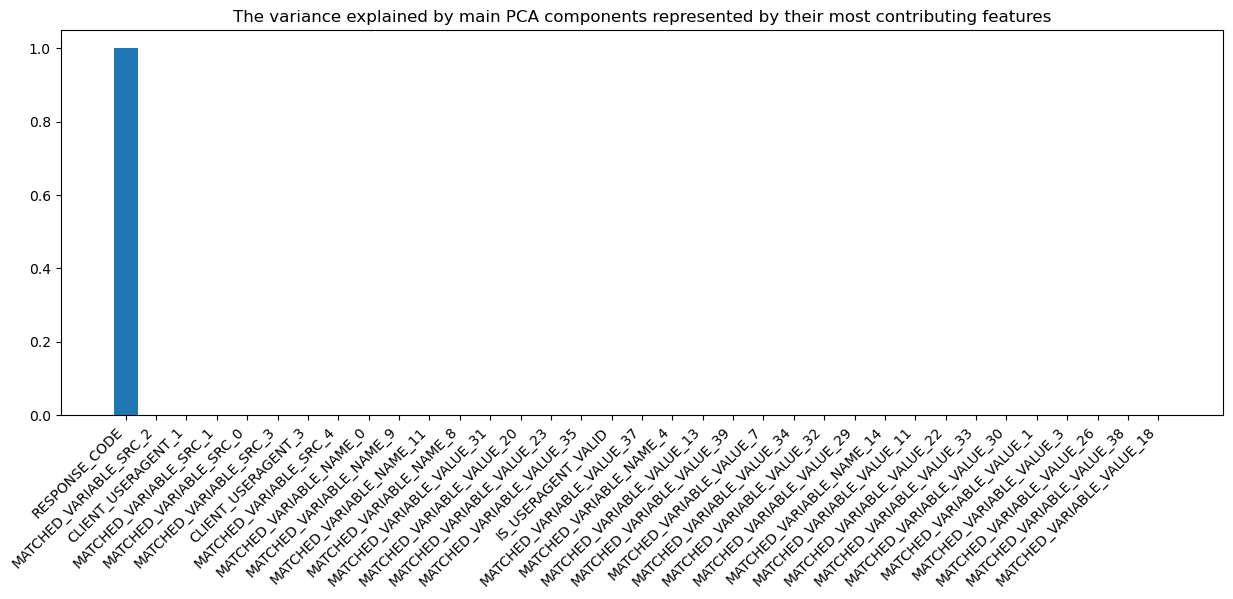

In [21]:
# Plot the resulting feature space data
plot_variance_explained(extractor_03)

In [22]:
##############################################################
# 04. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE, CLIENT_IP, RESPONSE_CODE

In [23]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_04 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP', 'RESPONSE_CODE'])
X_04 = extractor_04.fit_transform(data_df)

00:22:01 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP', 'RESPONSE_CODE']
00:22:01 INFO (extractor:65): Actual Scaling flag: True
00:22:01 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
00:22:01 INFO (extractor:110): Start fitting the Feature Extraction model
00:22:01 INFO (extractor:105): Considering feature columns: ['CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:22:01 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
00:22:02 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
00:22:02 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
00:22:02 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
00:22:03 INFO (extractor:126): Start fitting the scaler
00:22:03 INFO (extractor:131): Start fitting the PCA
00:22:03 INFO (extractor:134): Fitting 

00:22:04 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44' 'pca45'
 'pca46' 'pca47' 'pca48' 'pca49' 'pca50' 'pca51' 'pca52' 'pca53' 'pca54'
 'pca55' 'pca56' 'pca57' 'pca58' 'pca59' 'pca60' 'pca61' 'pca62' 'pca63'
 'pca64']
00:22:04 INFO (extractor:150): The PCA components (absolute, maximum) relations with features:
pca0        MATCHED_VARIABLE_SRC_2
pca1            CLIENT_USERAGENT_0
pca2        MATCHED_VARIABLE_SRC_1
pca3        MATCHED_VARIABLE_SRC_0
pca4        MATCHED_VARIABLE_SRC_3
                   ...            
pca60    MATCHED_VARIABLE_VALUE_21
pca61    MATCHED_VARIABLE_VALUE_12
pca62    MATCHED_VARIABLE_VALUE_36
pca63      MAT

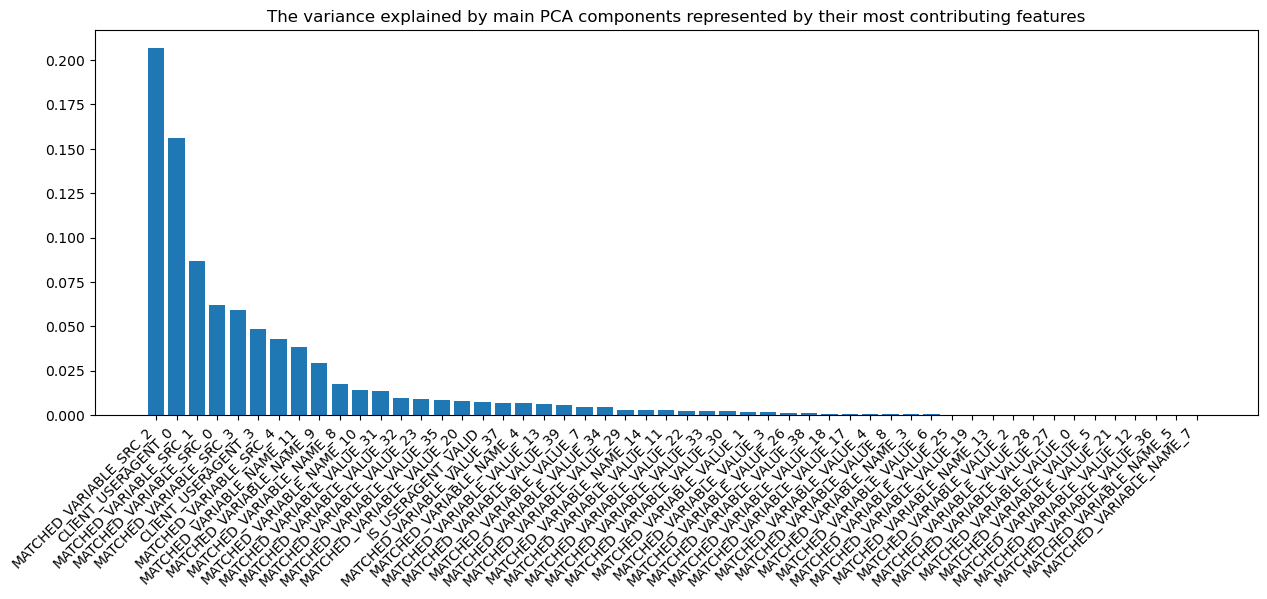

In [24]:
# Plot the resulting feature space data
plot_variance_explained(extractor_04)

In [25]:
##############################################################
# 05. The default run with Scaling and Normalization Enabled
#     Using only 'CLIENT_IP', 'REQUEST_SIZE', and 'RESPONSE_CODE'
#     columns for features

In [26]:
# Devise the columns to be ignored
ignore_columns = [ col_name for col_name in data_df.columns.values if col_name not in ['REQUEST_SIZE', 'CLIENT_IP', 'RESPONSE_CODE']]
logger.info(f'The columns to ignore:\n{ignore_columns}')

00:22:05 INFO (1515489764:3): The columns to ignore:
['EVENT_ID', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']


In [27]:
# Extract the features
extractor_05 = FeatureExtractor(ignore_columns=ignore_columns)
X_05 = extractor_05.fit_transform(data_df)

00:22:05 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
00:22:05 INFO (extractor:65): Actual Scaling flag: True
00:22:05 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
00:22:05 INFO (extractor:110): Start fitting the Feature Extraction model
00:22:05 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'REQUEST_SIZE', 'RESPONSE_CODE']
00:22:05 INFO (extractor:126): Start fitting the scaler
00:22:05 INFO (extractor:131): Start fitting the PCA
00:22:05 INFO (extractor:134): Fitting the Feature Extractor model is done!
00:22:05 INFO (extractor:175): Start transforming the data with the Feature Extraction model
00:22:05 INFO (extractor:182): Starting the scaler transform
00:22:05 INFO (extractor:187): Starting the PCA transform, the initial X shape: (57729, 10)
00:22:05 INFO (extractor:189): The X shape a

00:22:05 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8']
00:22:05 INFO (extractor:146): The complete PCA component feature contributions are:
      CLIENT_IP_0  CLIENT_IP_1  CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  CLIENT_IP_5  CLIENT_IP_6  CLIENT_IP_7  REQUEST_SIZE  RESPONSE_CODE
pca0     0.000003     0.000022     0.000050     0.000014     0.000008     0.000011     0.001932     0.001162  9.999975e-01       0.000021
pca1     0.000522     0.002202     0.010067     0.001980     0.000926     0.001561     0.966325     0.257093  2.166309e-03       0.000839
pca2     0.001216     0.007846     0.019325     0.005161     0.002805     0.004179     0.256823     0.966205  6.247490e-04       0.000192
pca3     0.020119     0.336059     0.915880     0.122804     0.092113     0.153832     0.015816     0.018457  4.820588e-05       0.001875
pca4     0.041766     0.084401     0.257321     0.426851     0.502024     0.700487     0.000606     0.0

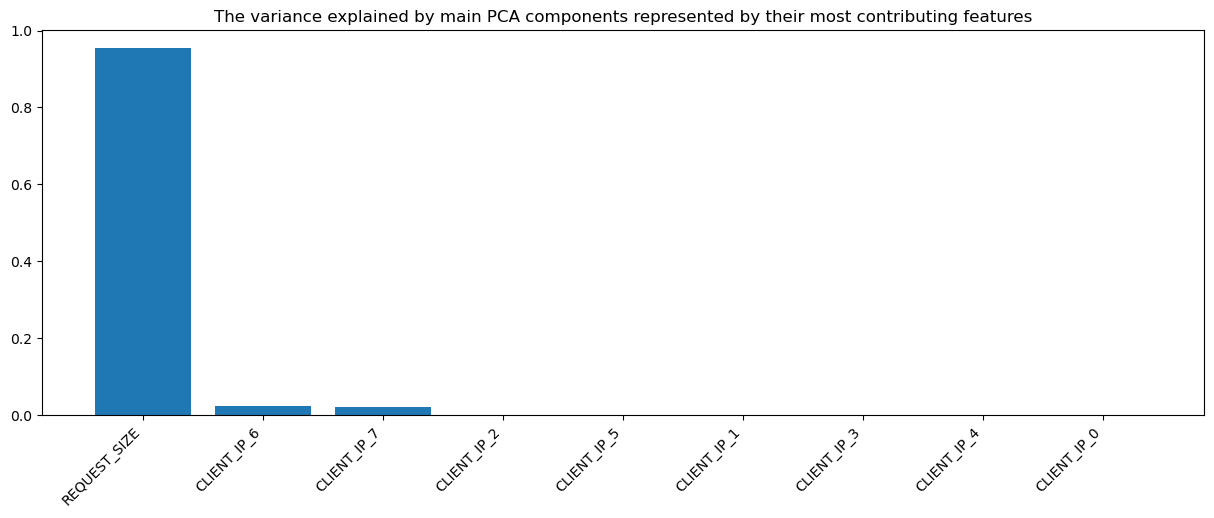

In [28]:
# Plot the resulting feature space data
plot_variance_explained(extractor_05)

In [29]:
%%capture
# Compute the feature space projection
X_05_proj = create_2d_projection(X_05)

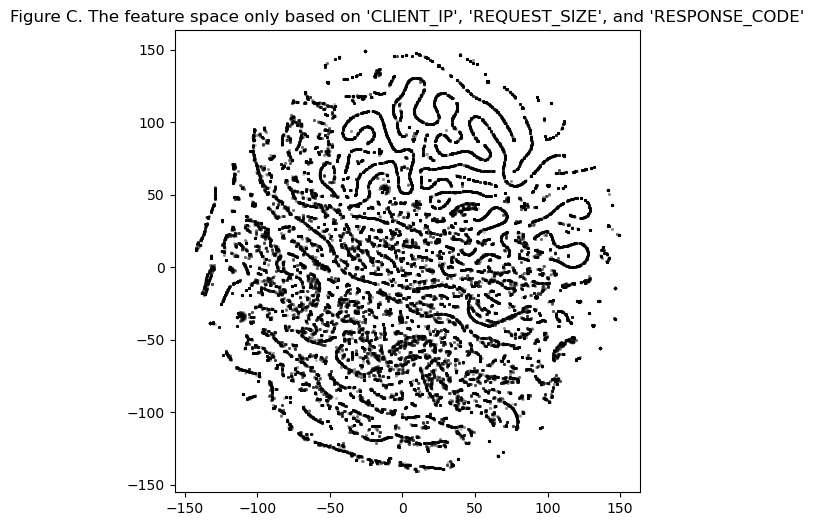

In [30]:
# Plot the resulting feature space in 2D
plot_2d_feature_space(X_05_proj, title="Figure C. The feature space only based on 'CLIENT_IP', 'REQUEST_SIZE', and 'RESPONSE_CODE'")

In [31]:
#############################################################################
# Summary of observations:
#    Note: The following holds for both for scaling being on and off, can be re-run
#    with is_scale=False for FeatureExtractor.
#
#    Observation 01: Figure A. and B. indicate that applying PCA to the feature space
#                    Improves its structure by making the clusters on projection more dense
#    
#    Observation 02: Based on the experiments (00-04) with removing data columns and doing PCA
#                    on the remaining ones, it looks like REQUEST_SIZE, CLIENT_IP, and 
#                    RESPONSE_CODE column values shall have the largest impact on the
#                    feature space and the other columns may be ignored
#
#    Observation 03: From the Experiment 05, one can see from Figure B. and C. that
#                    Ignoring all but REQUEST_SIZE, CLIENT_IP, and  RESPONSE_CODE
#                    columns for extracting features results in event cleaner cut/denser
#                    looking 2D cliuster projections. In other words, the impact of
#                    ignoring other columns is not that marginal.
#
#    Conclusion: Given the observations above, it is more robust to use all the
#                data columns and then to run PCA to project to a lower dimensional
#                space instead of exclusing data columns. So use the X_01 data.
#############################################################################

In [32]:
from src.utils.file_utils import store_numpy_zc

# Store the resulting features into file for further use
file_name = os.path.join('.', 'data', 'X')
store_numpy_zc(file_name, X=X_01)

00:24:03 INFO (file_utils:27): Dumping compressed numpy z file into: ./data/X
00:24:03 INFO (file_utils:29): File dumping is done!
